1. Universal Function Approximation
In this problem, we consider approximation of the function 𝑓(𝑥) = 𝑒!"# cos(4𝜋𝑥) defined on the interval 𝑥 ∈ [0, 1] Specifically, consider an ANN with one input node, one hidden layer (using ReLu activations), and one output node (linear activation). We consider choosing the weights in this ANN approximation, as developed in lecture, to provide a piecewise linear
approximation of 𝑓(𝑥). Specifically on the grid defined by 𝒢ℳ = { 𝑥% = 𝑖/(𝑀 − 1)}%&'(!) this approximation is exact and it is a linear function in between these grid points.

In [1]:
# Importing the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy.spatial import distance
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

b) Let 𝑓:((𝑥) denote the approximation using the size 𝑀 grid 𝒢(. Produce a plot of 𝑓(𝑥) and 𝑓:((𝑥) for 𝑀 ∈ {2, 4, 8, 16}.

In [ ]:
def func(x):
    f_x = np.exp(- 2 * np.asarray(x)) * np.cos(4 * np.pi * np.asarray(x))
    return f_x

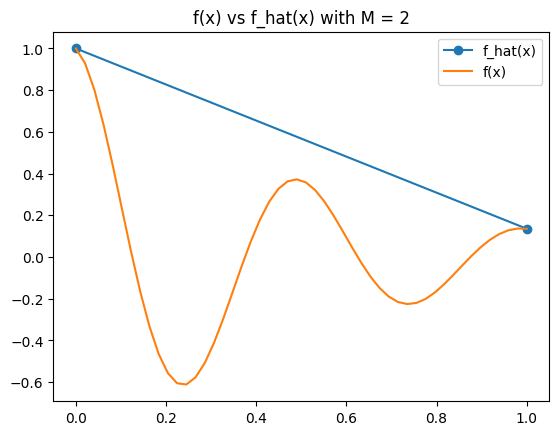

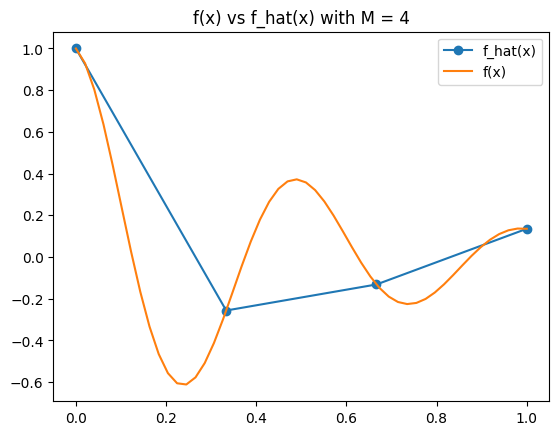

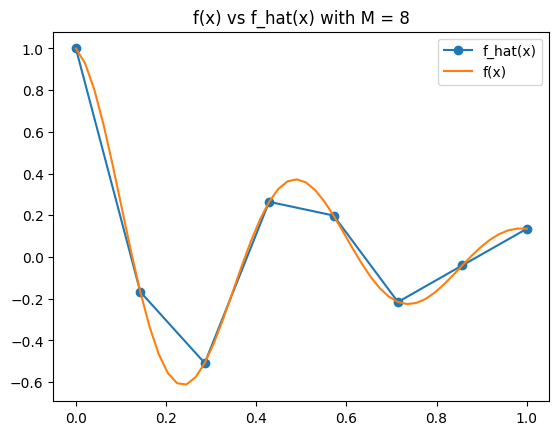

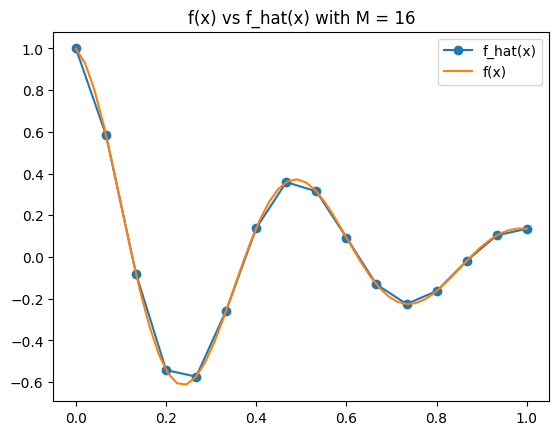

In [ ]:
x = np.linspace(0, 1)
y = func(x)
m = [2, 4, 8, 16]

for val in m:
    g_m = []
    
    for iter in range(val):
        g_m.append(iter / (val - 1))
    
    f_hat = func(g_m)
    plt.plot(g_m, f_hat, marker = 'o', label = "f_hat(x)")
    plt.plot(x, y, label = 'f(x)')
    plt.title(r"f(x) vs f_hat(x)" + f" with M = {val}")
    plt.legend()
    plt.show()

c) Consider the mean squared error of this approximation:
𝑀𝑆𝐸(𝑀) = ∫ B𝑓(𝑥) − 𝑓:((𝑥)C"𝑑𝑥 )' .
Note that this is not the average sum of squared error on 𝒢(, which is zero. MSE can be computed by using a finer grid of points than 𝒢ℳ; use 𝐺 = 10000 points. The normalized or relative MSE is 𝑁𝑀𝑆𝐸(𝑀) = 𝑀𝑆𝐸(𝑀)/𝐸 where 𝐸 is the energy in 𝑓(𝑥): 𝐸 = ∫ 𝑓"(𝑥)𝑑𝑥. )'
Produce a plot of 𝑁𝑀𝑆𝐸(𝑀) 𝑣𝑠 . 𝑀; more specifically, plot the 𝑁𝑀𝑆𝐸 in dB – i.e., 𝑁𝑀𝑆𝐸*+(𝑀) = 10 log)'M𝑁𝑀𝑆𝐸(𝑀)N 𝑣𝑠 . 𝑀. Plot this for each integer 𝑀 ≥ 2 up to large enough 𝑀 so that the NMSE goes below -40 dB.

In [ ]:
# Taken from GitHub page of Prof. Chugg (EE559)
# https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/nmse_01.py
def nmse(f, f_hat, x_grid, G = 10000):
    x_fine =  np.linspace(0, 1, G)                  
    f_fine = f(x_fine)                              
    f_hat_fine = np.interp(x_fine, x_grid, f_hat)   
    sq_error = (f_fine - f_hat_fine) ** 2           
    mse = np.mean(sq_error)                         
    ref = np.mean(f_fine ** 2)   
    return mse / ref   

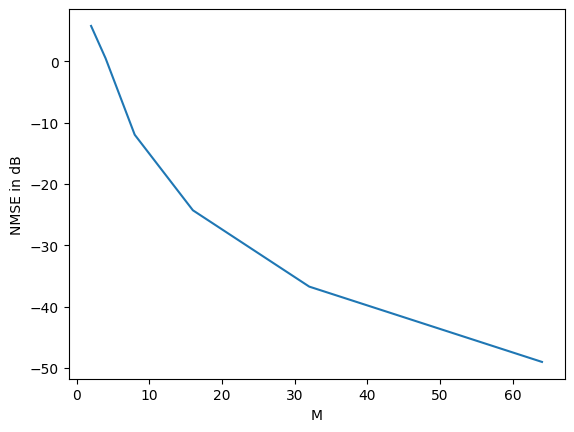

In [ ]:
n_m_s_e = []
m = [2, 4, 8, 16, 32, 64]

for i in m:
    g_m = []

    for j in range(i): 
      g_m.append(j / (i - 1))
    
    f_hat = func(g_m)
    n_m_s_e.append(nmse(func, f_hat, g_m))

plt.plot(m, 10 * np.log10(n_m_s_e))
plt.xlabel("M")
plt.ylabel("NMSE in dB")
plt.show()

2. Whitening and Simulation of Gaussian Random Vectors
In this problem, you will be generating scatter plots. For each of these plots, use the same range for the x and y axes. Also, use a square size for the plot – e.g., plt.figure(figsize=(6,6)). This will allow you to see the directional preference of the data.

(a) Consider a two-dimensional Gaussian random vector with mean vector and covariance matrix given by
𝑚# = ps_21TU# = S4 11 2T
Using np.random.normal(0,1,.) to generate i.i.d. standard normal realization,
produce a scatter plot with 5000 realizations of the random vector 𝑥⃗. Explain your method.

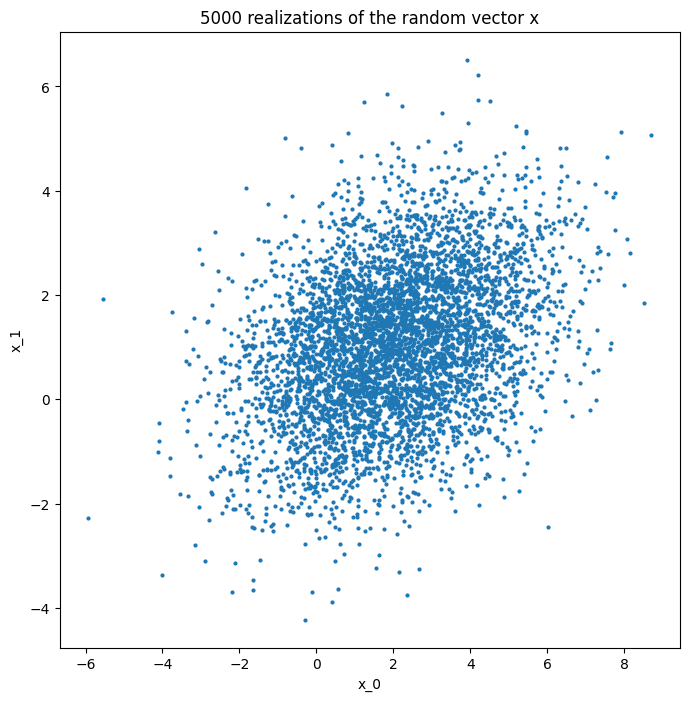

In [2]:
x_data = np.random.normal(0, 1, size = (5000, 2))
m_x = np.array([2, 1])
sigma = np.array([[4, 1], [1, 2]])
e_values, e_vectors = np.linalg.eig(sigma)
y_data = m_x + np.dot(e_vectors, np.dot(np.diag(np.sqrt(e_values)), x_data.T)).T

plt.figure(figsize = (8, 8))
plt.scatter(y_data[:, 0], y_data[:, 1], s = 4)
plt.title("5000 realizations of the random vector x")
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

(b) In this problem, we generate a white Gaussian vector in (i), then color it in (ii), and then whiten in 2 steps ((iii)-(iv)). Then we analyze the results in (v).

(i) Generate 5000 realizations of a zero-mean, white, Gaussian random vector 𝑤. Plot a scatter plot of these realizations. A white random vector is one with identity covariance matrix and zero mean.

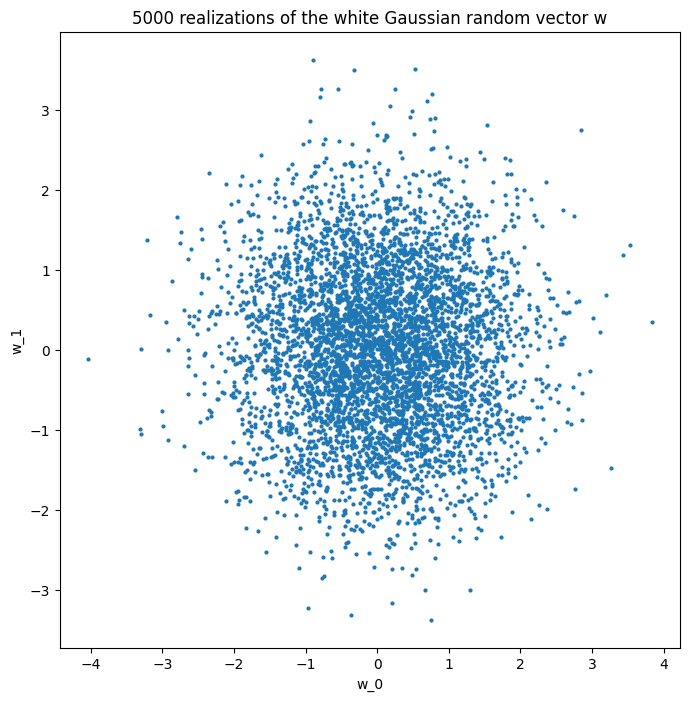

In [3]:
w_gaussian = np.random.normal(0, 1, size = (5000, 2))

plt.figure(figsize = (8, 8))
plt.scatter(w_gaussian[:, 0], w_gaussian[:, 1], s = 4)
plt.title("5000 realizations of the white Gaussian random vector w")
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.show()

(ii) Let 𝑦 = A𝑤 where A = S−1 −1 2 4T. What are the mean and variances of the two components of 𝑦? What is the correlation coefficient 𝑟%- = .!"
.!." between these two components? Are the positively or negatively correlated? Produce a scatter plot for the values of y obtained from the 5000 realizations of w. Compute the sample covariance matrix using these realizations and compare this to the covariance matrix of y as derived.

In [4]:
A = np.array([[-1, -1], [2, 4]])
y = np.dot(A, w_gaussian.T)
print("The mean of y vector = ", np.mean(y, axis = 1))
print("The variance of y vector = ", np.var(y, axis = 1))

corr = np.cov(y)
corr_coef = corr[0][1] / ((corr[0][0] * corr[1][1]) ** 0.5)
print("The correlation coefficient of the vector y = ", corr_coef)

if corr_coef < 0:
  print("Vectors are negatively correlated")

else:
  print("Vectors are positively correlated")

print("The covariance matrix of y vector: \n", corr)

The mean of y vector =  [-0.03725969  0.08392858]
The variance of y vector =  [ 1.99762123 20.2429949 ]
The correlation coefficient of the vector y =  -0.9481227546601331
Vectors are negatively correlated
The covariance matrix of y vector: 
 [[ 1.99802084 -6.0303899 ]
 [-6.0303899  20.24704431]]


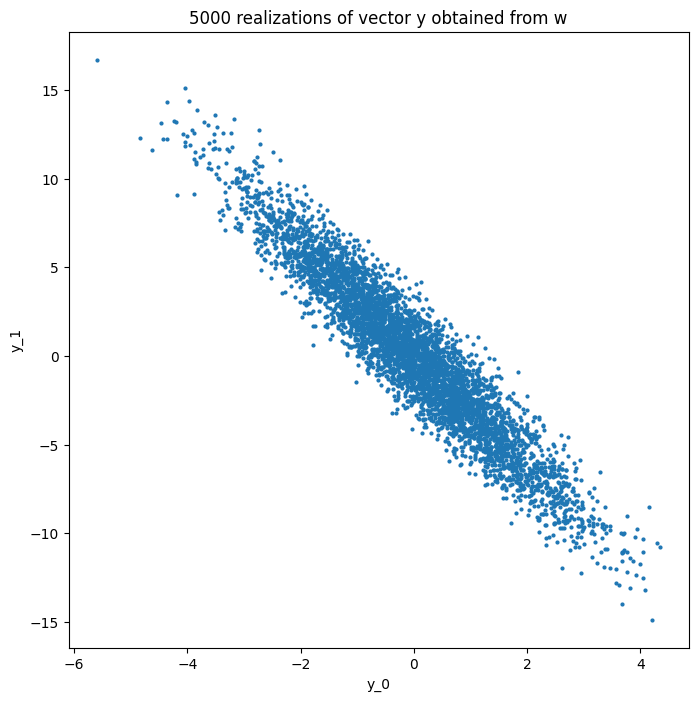

In [5]:
plt.figure(figsize = (8, 8))
plt.scatter(y[0], y[1], s = 4)
plt.xlabel('y_0')
plt.ylabel('y_1')
plt.title('5000 realizations of vector y obtained from w')
plt.show()

In [8]:
corr_w = np.identity(2)
y_hat = np.dot(np.dot(A, corr_w), A.T)
print("The covariance matrix of y_hat is\n", y_hat)

The covariance matrix of y_hat is
 [[ 2. -6.]
 [-6. 20.]]


(iii) Consider decorrelating, then whitening 𝑦. First, define 𝑣 = E/𝑦, where E is the 2 x 2 matrix of orthonormal eigen-vectors of the covariance matrix of 𝑦. What is the covariance matrix of 𝑣? Produce a scatter plot of the corresponding 5000 realizations of 𝑣, produced by 𝑣 = E/𝑦 using the realization of 𝑦 from the previous part.

In [ ]:
e_values, e_vectors = np.linalg.eigh(np.cov(y))
v_mat = np.dot(e_vectors.T, y)

print("The covariance matrix of v vector:")
print(np.cov(v_mat))

The covariance matrix of v vector:
[[1.79917846e-01 1.38583550e-15]
 [1.38583550e-15 2.19311148e+01]]


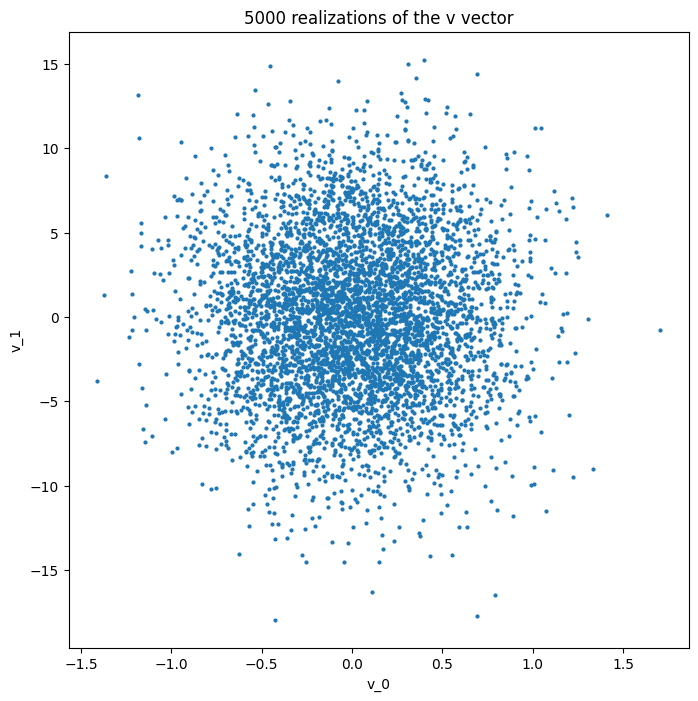

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(v_mat[0], v_mat[1], s = 4)
plt.xlabel('v_0')
plt.ylabel('v_1')
plt.title("5000 realizations of the v vector")
plt.show()

(iv) Let 𝑧 = ⋀!)/" 𝑣. What is the covariance matrix of 𝑧? Produce a scatter plot of the corresponding 5000 realizations of 𝑧 , produced by 𝑧 = ⋀
!)/" 𝑣. using the realization of 𝑣 from the previous part.

In [ ]:
lamb_mat = np.zeros((2, 2))
index = 0

for row in range(2):
    
    for columns in range(2):
        
        if row == columns:
            lamb_mat[row][columns] = e_values[index]
            index += 1

z = np.dot(np.sqrt(lamb_mat), v_mat)
print("The covariance matrix of z:\n", np.cov(z))

The covariance matrix of z:
 [[3.23704314e-02 2.74466498e-15]
 [2.74466498e-15 4.80973794e+02]]


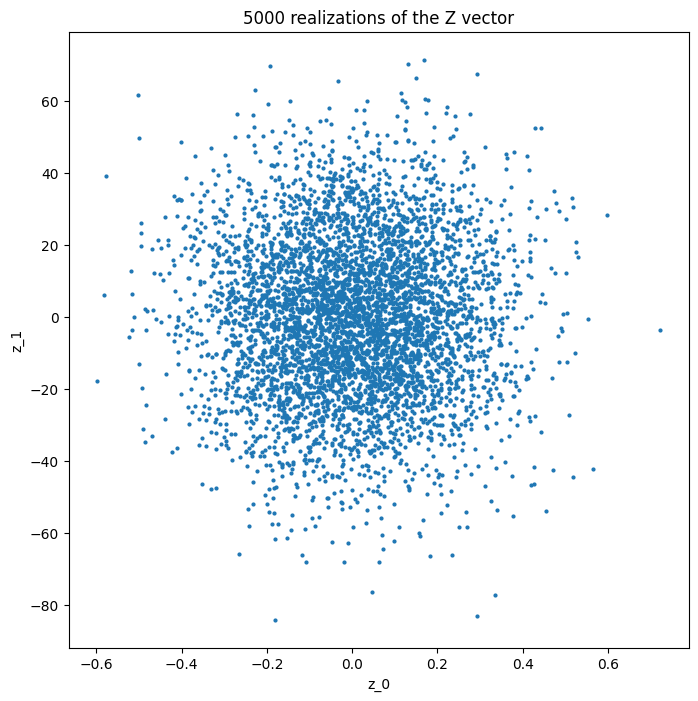

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(z[0], z[1], s = 4)
plt.xlabel('z_0')
plt.ylabel('z_1')
plt.title("5000 realizations of the Z vector")
plt.show()

3. Comparison of PCA and MDA on wine dataset.
In this problem you will use the UCI Wine dataset, which gives as features results of a chemical analysis of wines derived from 3 different cultivars (varieties) of grape. The goal is to predict the cultivar from the chemical analysis of the wine. It has 3 classes and 13 features. For your cross-validation runs below, use the entire provided dataset to divide into training and validation sets for each cross-validation loop. We will not need a separate test set in this problem. For the parts below, you will use the original (unnormalized) dataset for some runs, and use a standardized version of the dataset for other runs. For this problem, you can standardize the
whole dataset using parameters calculated from the whole dataset; then store it for future use. Normally, it’s best practice to standardize the dataset within the cross validation loop, so that the dataset can be standardized using parameters calculated from only the training data. In this problem each cross-validation fold has only 5% of data points in the validation set, so they
will on average have only a small effect on the normalization; and we are only using the results to compare across different methods, not to get a best estimate of performance on unknowns. So we are taking the simpler approach of standardizing the dataset once at the beginning.

(a) Baseline for comparison.
First standardize the dataset.
(i) We will pick 2 pairs of features to look at the data as follows: plot the data projected into 𝑥), 𝑥" space, and also plot the data instead projected into 𝑥), 𝑥1 space. For both plots, use 3 different symbols to denote data points belonging to class 1, 2, and 3.

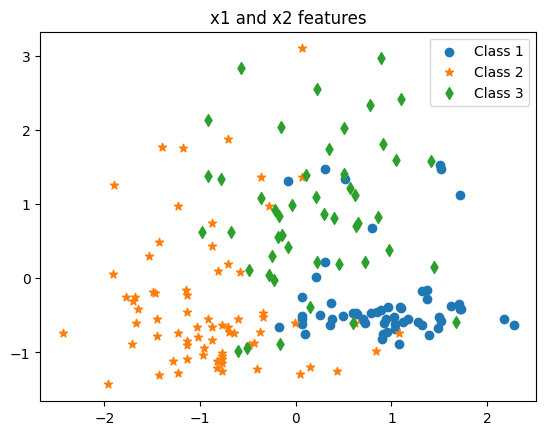

In [ ]:
wine_dataset = np.genfromtxt("wine_data.csv", delimiter = ',')
wine_dataset[0][0] = 1
x_dataset = wine_dataset[:, 1:]
y_dataset = wine_dataset[:, 0]
# Standardizing the data:
standardizing = StandardScaler()
standardizing.fit(x_dataset)
x_dataset = standardizing.transform(x_dataset)
x1_on_2 = x_dataset[:, : 2]

plt.scatter(x1_on_2[y_dataset == 1][:, 0], x1_on_2[y_dataset == 1][:, 1], label = 'Class 1')
plt.scatter(x1_on_2[y_dataset == 2][:, 0], x1_on_2[y_dataset == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(x1_on_2[y_dataset == 3][:, 0], x1_on_2[y_dataset == 3][:, 1], marker = 'd', label = 'Class 3')
plt.title("x1 and x2 features")
plt.legend()
plt.show()

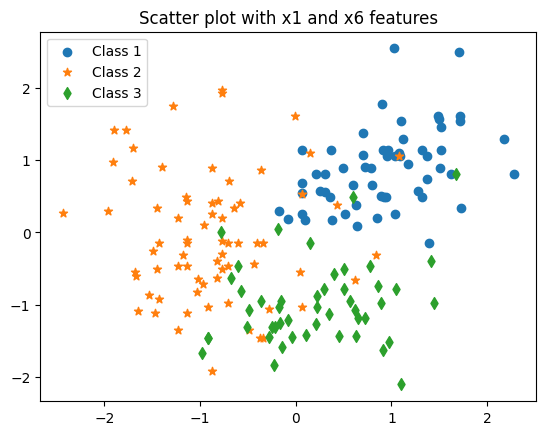

In [ ]:
x1_on_6 = x_dataset[:, [0, 5]]

plt.scatter(x1_on_6[y_dataset == 1][:, 0], x1_on_6[y_dataset == 1][:, 1], label = 'Class 1')
plt.scatter(x1_on_6[y_dataset == 2][:, 0], x1_on_6[y_dataset == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(x1_on_6[y_dataset == 3][:, 0], x1_on_6[y_dataset == 3][:, 1], marker = 'd', label = 'Class 3')
plt.title("Scatter plot with x1 and x6 features")
plt.legend()
plt.show()

(ii) Run a multiclass perceptron classifier on the 2D data using only features 𝑥), 𝑥". For each run, first shuffle the data, then use 20-fold cross validation, and compute the mean classification error rate over the 20 folds. Also store the weight values from the result of the first fold. 
Do a total of 5 runs. Report the mean classification error rate from each cross-val run, and also report the average and standard deviation of the mean classification error over the 5 runs. Also report 2 plots: for the run with the lowest classification error rate, plot the results in a scatter plot (labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold); then produce another similar plot for the run with the highest classification error rate.

In [ ]:
misclassify_rate = []
weights = []

for run in range(5):
    misclassify_rate_list = []
    x_dataset_prime, y_dataset_n = shuffle(x1_on_2, y_dataset)
    k_fold = KFold(n_splits = 20)
    num_fold = 1
    
    for i, j in k_fold.split(x_dataset_prime):
        x_train, x_validate = x_dataset_prime[i], x_dataset_prime[j]
        y_train, y_validate = y_dataset_n[i], y_dataset_n[j]
        percept = Perceptron()
        percept.fit(x_train, y_train)
        predicted_label = percept.predict(x_validate)
        misclassify_rate_list.append(1 - accuracy_score(predicted_label, y_validate))

        if num_fold == 1:
          weights.append(percept)

        num_fold += 1

    misclassify_rate.append(np.mean(misclassify_rate_list))
    print(f"Mean classification error rate for run-{run + 1}", '=', misclassify_rate[-1])

print("Average classification error rate over 20 folds = ", np.mean(misclassify_rate))
print("Standard classification error rate =", np.std(misclassify_rate))

Mean classification error rate for run-1 = 0.2847222222222222
Mean classification error rate for run-2 = 0.2645833333333333
Mean classification error rate for run-3 = 0.27083333333333337
Mean classification error rate for run-4 = 0.3201388888888889
Mean classification error rate for run-5 = 0.3277777777777778
Average classification error rate over 20 folds =  0.2936111111111111
Standard classification error rate = 0.025735327834815563


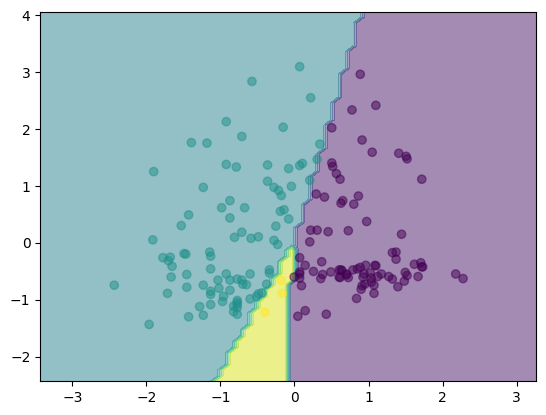

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(x1_on_2[:, 0].min() - 1, x1_on_2[:, 0].max() + 1, 0.1), np.arange(x1_on_2[:, 1].min() - 1, x1_on_2[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmin(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmin(misclassify_rate)].predict(x1_on_2)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(x1_on_2[:, 0], x1_on_2[:, 1], c = w_optimal, alpha = 0.5)

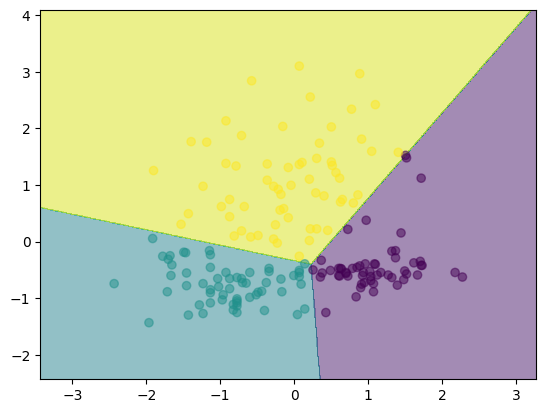

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(x1_on_2[:, 0].min() - 1, x1_on_2[:, 0].max() + 1, 0.01), np.arange(x1_on_2[:, 1].min() - 1, x1_on_2[:, 1].max() + 1, 0.01))
y_labels = weights[np.argmax(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmax(misclassify_rate)].predict(x1_on_2)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(x1_on_2[:, 0], x1_on_2[:, 1], c = w_optimal, alpha = 0.5)

(iii) Repeat part (ii) for 𝑥), 𝑥1.

In [ ]:
misclassify_rate_new = []
weights_new = []

for run_n in range(5):
    misclassify_rate_list_new = []
    x_dataset_prime_n, y_dataset_n16 = shuffle(x1_on_6, y_dataset)
    k_fold = KFold(n_splits = 20)
    num_fold_n = 1
    
    for i, j in k_fold.split(x_dataset_prime_n):
        x_train_n, x_validate_n = x_dataset_prime_n[i], x_dataset_prime_n[j]
        y_train_n, y_validate_n = y_dataset_n16[i], y_dataset_n16[j]
        percept_n = Perceptron()
        percept_n.fit(x_train_n, y_train_n)
        predicted_label_n = percept_n.predict(x_validate_n)
        misclassify_rate_list_new.append(1 - accuracy_score(predicted_label_n, y_validate_n))

        if num_fold_n == 1:
          weights_new.append(percept_n)

        num_fold_n += 1

    misclassify_rate_new.append(np.mean(misclassify_rate_list_new))
    print(f"Mean classification error rate for run-{run_n + 1}", '=', misclassify_rate_new[-1])

print("Average classification error rate over 20 folds = ", np.mean(misclassify_rate_new))
print("Standard classification error rate =", np.std(misclassify_rate_new))

Mean classification error rate for run-1 = 0.1930555555555556
Mean classification error rate for run-2 = 0.18680555555555559
Mean classification error rate for run-3 = 0.24236111111111117
Mean classification error rate for run-4 = 0.19791666666666669
Mean classification error rate for run-5 = 0.21527777777777776
Average classification error rate over 20 folds =  0.20708333333333334
Standard classification error rate = 0.02001831722926176


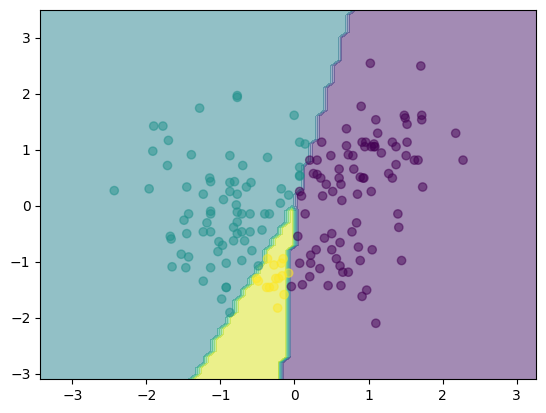

In [ ]:
x16_mesh, y16_mesh = np.meshgrid(np.arange(x1_on_6[:, 0].min() - 1, x1_on_6[:, 0].max() + 1, 0.1), np.arange(x1_on_6[:, 1].min() - 1, x1_on_6[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmin(misclassify_rate_new)].predict(np.c_[x16_mesh.ravel(), y16_mesh.ravel()])
y_labels = y_labels.reshape(x16_mesh.shape)
w_optimal = weights[np.argmin(misclassify_rate_new)].predict(x1_on_6)
plt.contourf(x16_mesh, y16_mesh, y_labels, alpha = 0.5)
plt.scatter(x1_on_6[:, 0], x1_on_6[:, 1], c = w_optimal, alpha = 0.5)

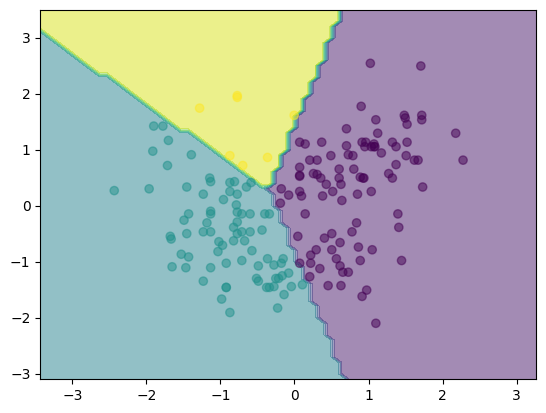

In [ ]:
x16_mesh, y16_mesh = np.meshgrid(np.arange(x1_on_6[:, 0].min() - 1, x1_on_6[:, 0].max() + 1, 0.1), np.arange(x1_on_6[:, 1].min() - 1, x1_on_6[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmax(misclassify_rate_new)].predict(np.c_[x16_mesh.ravel(), y16_mesh.ravel()])
y_labels = y_labels.reshape(x16_mesh.shape)
w_optimal = weights[np.argmax(misclassify_rate_new)].predict(x1_on_6)
plt.contourf(x16_mesh, y16_mesh, y_labels, alpha = 0.5)
plt.scatter(x1_on_6[:, 0], x1_on_6[:, 1], c = w_optimal, alpha = 0.5)

(b) PCA based on unnormalized dataset.
For this part, use the original dataset with no standardization.
(i) Run PCA, reducing to 2 dimensions, on the entire dataset. Plot the data projected into the 2D space, using the same symbols as in part (a) to denote the class label of each data point. Compared with the baseline of (a), do you expect a better classification result with PCA?

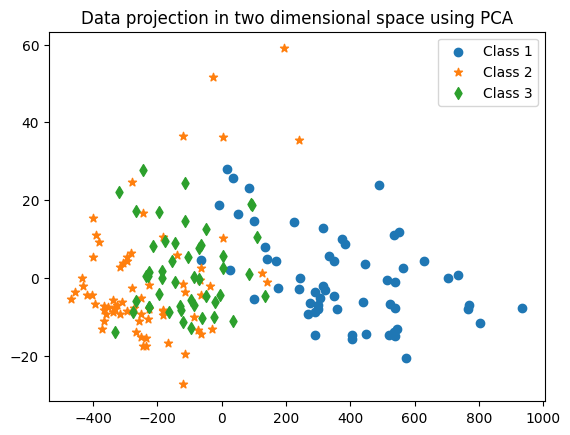

In [ ]:
wine_dataset = np.genfromtxt("wine_data.csv", delimiter = ',')
wine_dataset[0][0] = 1
x_data = wine_dataset[:, 1:]
y_data = wine_dataset[:, 0]
p_c_a = PCA(n_components = 2)
X_trans = p_c_a.fit_transform(x_data)

plt.scatter(X_trans[y_data == 1][:, 0], X_trans[y_data == 1][:, 1], label = 'Class 1')
plt.scatter(X_trans[y_data == 2][:, 0], X_trans[y_data == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(X_trans[y_data == 3][:, 0], X_trans[y_data == 3][:, 1], marker = 'd', label = 'Class 3')
plt.title("Data projection in two dimensional space using PCA")
plt.legend()
plt.show()

(ii) Repeat (a)(ii) except for the 2 new features resulting from PCA (plot everything in the new (𝑥^), 𝑥^") space).

In [ ]:
misclassify_rate = []
weights = []

for run in range(5):
    misclassify_rate_list = []
    x_dataset_prime, y_dataset_n = shuffle(X_trans, y_data)
    k_fold = KFold(n_splits = 20)
    num_fold = 1
    
    for i, j in k_fold.split(x_dataset_prime):
        x_train, x_validate = x_dataset_prime[i], x_dataset_prime[j]
        y_train, y_validate = y_dataset_n[i], y_dataset_n[j]
        percept = Perceptron()
        percept.fit(x_train, y_train)
        predicted_label = percept.predict(x_validate)
        misclassify_rate_list.append(1 - accuracy_score(predicted_label, y_validate))

        if num_fold == 1:
          weights.append(percept)

        num_fold += 1

    misclassify_rate.append(np.mean(misclassify_rate_list))
    print(f"Mean classification error rate for run-{run + 1}", '=', misclassify_rate[-1])

print("Average classification error rate over 20 folds = ", np.mean(misclassify_rate))
print("Standard classification error rate =", np.std(misclassify_rate))

Mean classification error rate for run-1 = 0.37222222222222223
Mean classification error rate for run-2 = 0.41875
Mean classification error rate for run-3 = 0.4138888888888889
Mean classification error rate for run-4 = 0.4527777777777778
Mean classification error rate for run-5 = 0.5006944444444444
Average classification error rate over 20 folds =  0.43166666666666664
Standard classification error rate = 0.04295822331774538


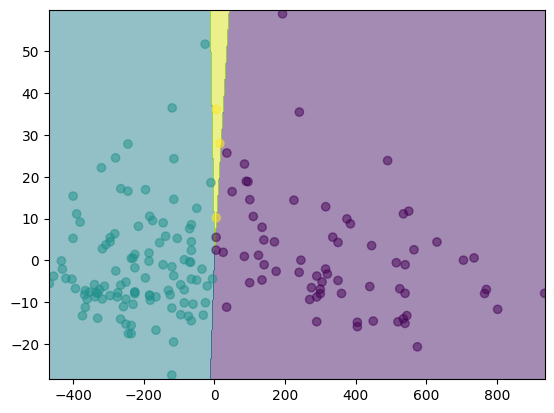

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(X_trans[:, 0].min() - 1, X_trans[:, 0].max() + 1, 0.1), np.arange(X_trans[:, 1].min() - 1, X_trans[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmin(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmin(misclassify_rate)].predict(X_trans)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c = w_optimal, alpha = 0.5)

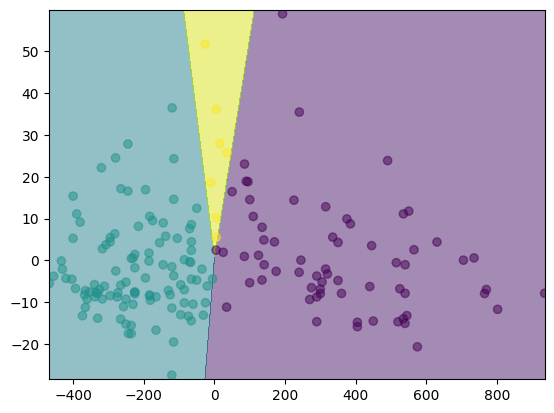

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(X_trans[:, 0].min() - 1, X_trans[:, 0].max() + 1, 0.1), np.arange(X_trans[:, 1].min() - 1, X_trans[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmax(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmax(misclassify_rate)].predict(X_trans)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c = w_optimal, alpha = 0.5)

(c) PCA based on standardized dataset.
Repeat (b)(i)-(ii) except first standardize the data.

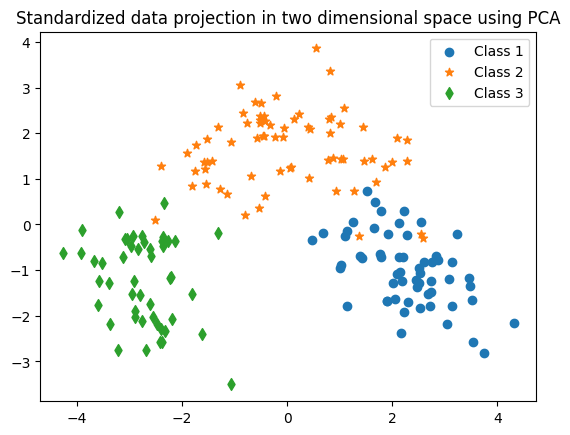

In [ ]:
wine_dataset = np.genfromtxt("wine_data.csv", delimiter = ',')
wine_dataset[0][0] = 1
x_dataset = wine_dataset[:, 1:]
y_dataset = wine_dataset[:, 0]
# Standardizing the data:
standardizing = StandardScaler()
standardizing.fit(x_dataset)
x_dataset = standardizing.transform(x_dataset)
p_c_a = PCA(n_components = 2)
x_pca = p_c_a.fit_transform(x_dataset)

plt.scatter(x_pca[y_dataset == 1][:, 0], x_pca[y_dataset == 1][:, 1], label = 'Class 1')
plt.scatter(x_pca[y_dataset == 2][:, 0], x_pca[y_dataset == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(x_pca[y_dataset == 3][:, 0], x_pca[y_dataset == 3][:, 1], marker = 'd', label = 'Class 3')
plt.title("Standardized data projection in two dimensional space using PCA")
plt.legend()
plt.show()

In [ ]:
misclassify_rate = []
weights = []

for run in range(5):
    misclassify_rate_list = []
    x_dataset_prime, y_dataset_n = shuffle(x_pca, y_dataset)
    k_fold = KFold(n_splits = 20)
    num_fold = 1
    
    for i, j in k_fold.split(x_dataset_prime):
        x_train, x_validate = x_dataset_prime[i], x_dataset_prime[j]
        y_train, y_validate = y_dataset_n[i], y_dataset_n[j]
        percept = Perceptron()
        percept.fit(x_train, y_train)
        predicted_label = percept.predict(x_validate)
        misclassify_rate_list.append(1 - accuracy_score(predicted_label, y_validate))

        if num_fold == 1:
          weights.append(percept)

        num_fold += 1

    misclassify_rate.append(np.mean(misclassify_rate_list))
    print(f"Mean classification error rate for run-{run + 1}", '=', misclassify_rate[-1])

print("Average classification error rate over 20 folds = ", np.mean(misclassify_rate))
print("Standard classification error rate =", np.std(misclassify_rate))

Mean classification error rate for run-1 = 0.03402777777777779
Mean classification error rate for run-2 = 0.05138888888888891
Mean classification error rate for run-3 = 0.061111111111111116
Mean classification error rate for run-4 = 0.03402777777777779
Mean classification error rate for run-5 = 0.03541666666666667
Average classification error rate over 20 folds =  0.04319444444444446
Standard classification error rate = 0.011105901556502113


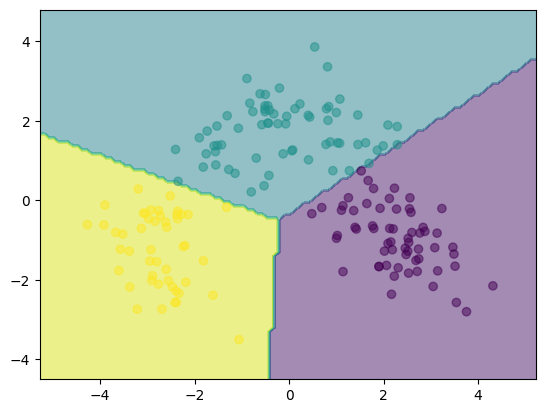

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1, 0.1), np.arange(x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmin(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmin(misclassify_rate)].predict(x_pca)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = w_optimal, alpha = 0.5)

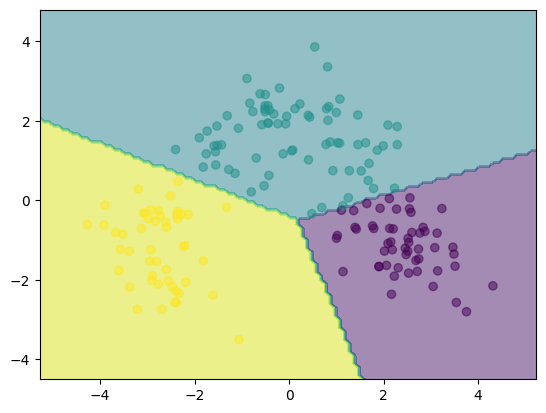

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1, 0.1), np.arange(x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmax(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmax(misclassify_rate)].predict(x_pca)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = w_optimal, alpha = 0.5)

(d) MDA (using LDA as an approximation to MDA).
For this part, first standardize the data.
(i) Because this is a 3-class problem, MDA (rather than FLD) is appropriate to use. We will implement this using instead linear discriminant analysis (LDA), which is similar to MDA (more detail on the similarities and differences will be given in a future lecture) on the entire dataset to reduce the dimensionality to 2. Plot the data projected into the 2D space, using the same symbols as in part (a) to denote the class label of each data point. How do you expect a linear classifier to do on this data compared with (b) and (a) above?

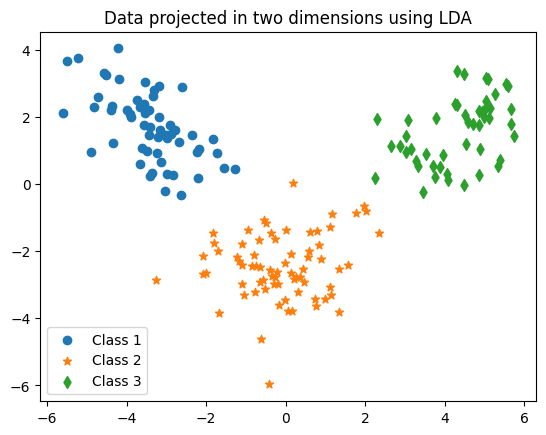

In [ ]:
wine_dataset = np.genfromtxt("wine_data.csv", delimiter = ',')
wine_dataset[0][0] = 1
rows = wine_dataset[:, 1:]
columns_label = wine_dataset[:, 0]
scaler = StandardScaler()
scaler.fit(rows)
rows = scaler.transform(rows)
l_d_a = LDA(n_components = 2)
rows = l_d_a.fit_transform(rows, columns_label)

plt.scatter(rows[columns_label == 1][:, 0], rows[columns_label == 1][:, 1], label = 'Class 1')
plt.scatter(rows[columns_label == 2][:, 0], rows[columns_label == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(rows[columns_label == 3][:, 0], rows[columns_label == 3][:, 1], marker = 'd', label = 'Class 3')
plt.title("Data projected in two dimensions using LDA")
plt.legend()
plt.show()

(ii) Repeat (a)(ii) except for the 2 new features resulting from MDA/LDA (plot
everything in the new (𝑥^), 𝑥^") space).

In [ ]:
misclassify_rate = []
weights = []

for run in range(5):
    misclassify_rate_list = []
    x_dataset_prime, y_dataset_n = shuffle(rows, columns_label)
    k_fold = KFold(n_splits = 20)
    num_fold = 1
    
    for i, j in k_fold.split(x_dataset_prime):
        x_train, x_validate = x_dataset_prime[i], x_dataset_prime[j]
        y_train, y_validate = y_dataset_n[i], y_dataset_n[j]
        percept = Perceptron()
        percept.fit(x_train, y_train)
        predicted_label = percept.predict(x_validate)
        misclassify_rate_list.append(1 - accuracy_score(predicted_label, y_validate))

        if num_fold == 1:
          weights.append(percept)

        num_fold += 1

    misclassify_rate.append(np.mean(misclassify_rate_list))
    print(f"Mean classification error rate for run-{run + 1}", '=', misclassify_rate[-1])

print("Average classification error rate over 20 folds = ", np.mean(misclassify_rate))
print("Standard classification error rate =", np.std(misclassify_rate))

Mean classification error rate for run-1 = 0.011805555555555559
Mean classification error rate for run-2 = 0.005555555555555558
Mean classification error rate for run-3 = 0.005555555555555558
Mean classification error rate for run-4 = 0.00625
Mean classification error rate for run-5 = 0.005555555555555558
Average classification error rate over 20 folds =  0.006944444444444446
Standard classification error rate = 0.002445391230785974


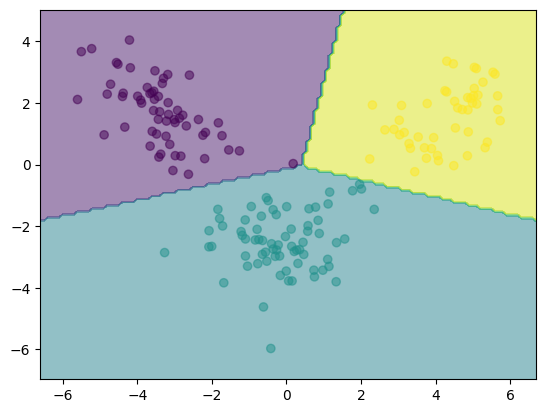

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(rows[:, 0].min() - 1, rows[:, 0].max() + 1, 0.1), np.arange(rows[:, 1].min() - 1, rows[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmin(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmin(misclassify_rate)].predict(rows)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(rows[:, 0], rows[:, 1], c = w_optimal, alpha = 0.5)

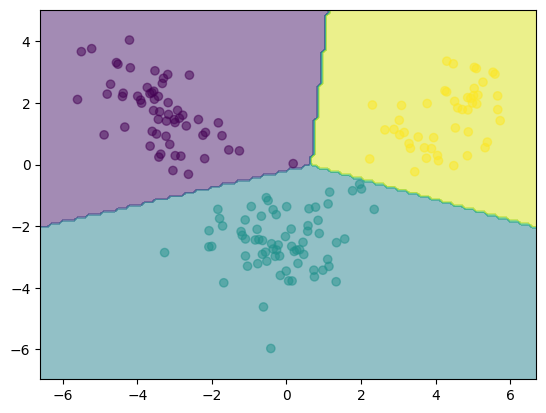

In [ ]:
x12_mesh, y12_mesh = np.meshgrid(np.arange(rows[:, 0].min() - 1, rows[:, 0].max() + 1, 0.1), np.arange(rows[:, 1].min() - 1, rows[:, 1].max() + 1, 0.1))
y_labels = weights[np.argmax(misclassify_rate)].predict(np.c_[x12_mesh.ravel(), y12_mesh.ravel()])
y_labels = y_labels.reshape(x12_mesh.shape)
w_optimal = weights[np.argmax(misclassify_rate)].predict(rows)
plt.contourf(x12_mesh, y12_mesh, y_labels, alpha = 0.5)
plt.scatter(rows[:, 0], rows[:, 1], c = w_optimal, alpha = 0.5)

4. Mahalanobis distance and Bayes classification for minimum error
In a 2-class classification problem, the class conditional densities are: pM𝑥 ` 𝑆%N = NB𝑥 b 𝑚%, Σ%C , 𝑖 = 1,2

(a) Given the following class means and covariance matrices for a 2D problem:
𝑚) = d21e , 𝑚" = d−21eΣ) = B 1 −1−1 4C , Σ" = B4 00 1C
On a single 2D plot, plot the 2 class means, and make a filled-contour plot of constant Mahalanobis distances from the mean for each class, as follows: 𝑑(
" M𝑥,𝑚)N = 𝐵" and 𝑑(" M𝑥,𝑚"N = 𝐵", for values 𝐵 = 0.5, 1.0, 1.5, 2.0. (End result should be 4 curves for 𝑑(" M𝑥,𝑚)N = 𝐵" and 4 curves for 𝑑(
" M𝑥,𝑚"N = 𝐵" , with colored fills between the curves.)

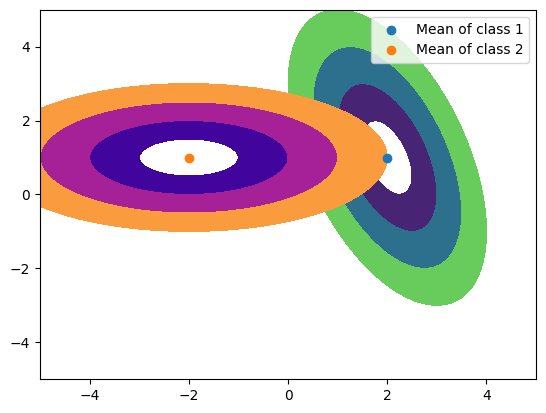

In [ ]:
m1_vec = np.array([2, 1])
m2_vec = np.array([-2, 1])
sigma_1 = np.array([[1, -1], [-1, 4]])
sigma_2 = np.array([[4, 0], [0, 1]])
B = np.array([0.5, 1.0, 1.5, 2.0]) ** 2
maha1_distance = [] 
maha2_distance = []
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_mesh, y_mesh = np.meshgrid(x, y)
data_flatten = np.stack((np.ravel(x_mesh), np.ravel(y_mesh)), axis = 1)

for da in data_flatten:
    maha1_distance.append((distance.mahalanobis(da, m1_vec, np.linalg.inv(sigma_1))) ** 2)
    maha2_distance.append((distance.mahalanobis(da, m2_vec, np.linalg.inv(sigma_2))) ** 2)
    
maha1_distance = np.array(maha1_distance).reshape([100, 100])
maha2_distance = np.array(maha2_distance).reshape([100, 100])

plt.contourf(x_mesh, y_mesh, maha1_distance, levels = B)
plt.contourf(x_mesh, y_mesh, maha2_distance, levels = B, cmap = 'plasma')
plt.scatter(m1_vec[0], m1_vec[1], label = "Mean of class 1")
plt.scatter(m2_vec[0], m2_vec[1], label = "Mean of class 2")
plt.legend()
plt.show()

(c) For the means and covariance matrices given in (a), use your answer to (b) to plot the decision regions and boundaries of the Bayes classifier for minimum error. Also show the class means on the plot. Do this for 3 cases:
(i) 𝑃(𝑆)) = 𝑃(𝑆") = 0.5
(ii) P(S)) = 0.3, P(S") = 0.7
(iii) 𝑃(𝑆)) = 0.1, 𝑃(𝑆") = 0.9

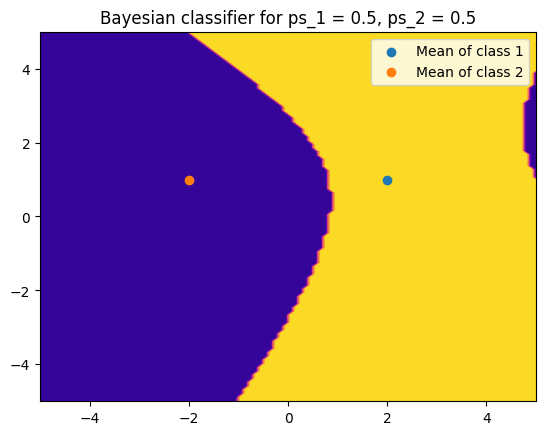

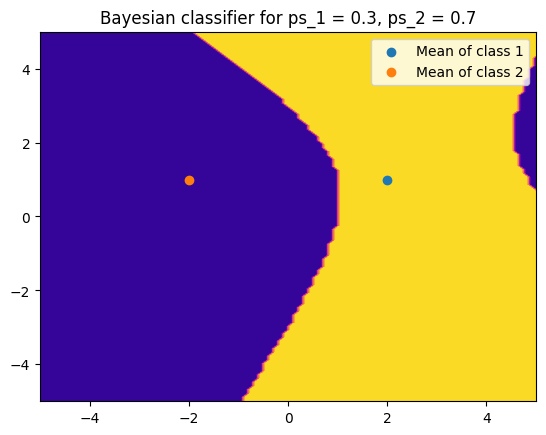

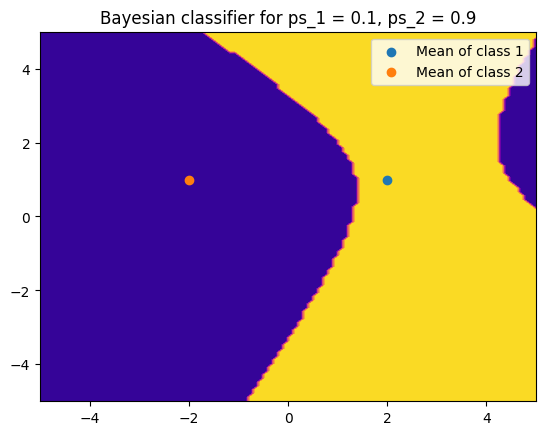

In [ ]:
ps_1 = [0.5, 0.3, 0.1]
ps_2 = [0.5, 0.7, 0.9]

for ele in range(len(ps_1)):
    gam_1 = 0.5 * np.log(np.linalg.det(sigma_1)) - maha1_distance + np.log(ps_1[ele])
    gam_2 = 0.5 * np.log(np.linalg.det(sigma_2)) - maha2_distance + np.log(ps_2[ele])
    plotdec_region = np.where(gam_1 > gam_2, 1, 0)
    plt.contourf(x_mesh, y_mesh, plotdec_region, cmap = 'plasma')
    plt.scatter(m1_vec[0], m1_vec[1], label = "Mean of class 1")
    plt.scatter(m2_vec[0], m2_vec[1], label = "Mean of class 2")
    plt.title("Bayesian classifier for ps_1 = {}, ps_2 = {}".format(ps_1[ele], ps_2[ele]))
    plt.legend()
    plt.show()